In [1]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np

from Utilities import *
from getABSDData import getABSDData

import os
import pandas

D:\projects\machine learning\Airbus-Ship-Detection-Challenge\Utilities\ImageDataStore.py:21: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (len(image_file_names) == len(labels), "The length of image_file_names and labels muss be the same!")
D:\projects\machine learning\Airbus-Ship-Detection-Challenge\Utilities\ImageDataStore.py:49: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(label_shape) == 1, "label_converter muss have 1-D return value!")
D:\projects\machine learning\Airbus-Ship-Detection-Challenge\Utilities\ImageDataStore.py:53: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(label_shape) == 1, "If label_converter is not set, elements in labels muss be 1-D arrays!")


Pandas csv reading was running for 0.676746 s
The dataset contains 262,060 images.


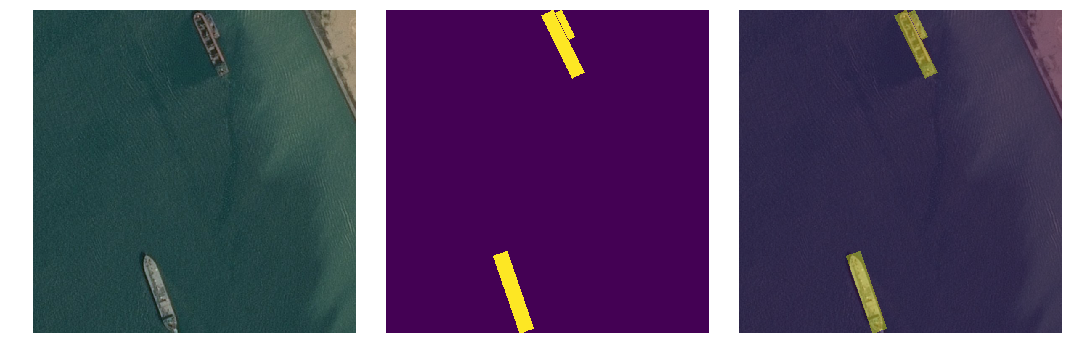

In [2]:
DATASET_FOLDER = "data"
TRAIN_SUBFOLDER = os.path.join(DATASET_FOLDER, "train")
TRAINING_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "train_ship_segmentations.csv")

with ElapsedTime("Pandas csv reading"):
    training_data = pandas.read_csv(TRAINING_ANNOTATION_FILE)
nLabeledExamples = training_data.size
print("The dataset contains {:,d} images.".format(nLabeledExamples))

masks = training_data
ImageId = '00abc623a.jpg'

img = imread(os.path.join(TRAIN_SUBFOLDER, ImageId))
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += annotation2Mask(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

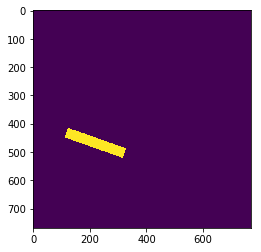

In [19]:
mask = annotation2Mask(training_data.iloc[93, 1])
plt.imshow(mask)

In [20]:
from Utilities import mask2BoxParameters

x, y, a, l, s = mask2BoxParameters(mask)

In [21]:
a / np.pi * 180, l, s

(110.55604521958347, 215.72667892497674, 34.539832078341085)